In [1]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [4]:
your_local_path = 'D:/shrikant/Application'

In [ ]:
#source - twitter data analysis https://datascienceplus.com/twitter-analysis-with-python/

In [5]:
import os
os.environ['PROJ_LIB'] = r'D:/shrikant/Application/anaconda/pkgs/proj4-5.2.0-ha925a31_1/Library/share'

In [6]:
import numpy as np
import pandas as pd
import re
import warnings

In [7]:
#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from mpl_toolkits.basemap import Basemap #conda install basemap & then set the PROJ_LIB envt variable
from wordcloud import WordCloud, STOPWORDS #pip  install Wordcloud

In [9]:
#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
//tweets = pd.read_csv('D:/shrikant/Application/tweets_all.csv', encoding = "ISO-8859-1")

In [ ]:
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


tweets['text'][1]

In [ ]:
#https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
#twitter analysis

import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

class TwitterClient(object): 
	''' 
	Generic Twitter Class for sentiment analysis. 
	'''
	def __init__(self): 
		''' 
		Class constructor or initialization method. 
		'''
		# keys and tokens from the Twitter Dev Console 
		consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
		consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
		access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
		access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'

		# attempt authentication 
		try: 
			# create OAuthHandler object 
			self.auth = OAuthHandler(consumer_key, consumer_secret) 
			# set access token and secret 
			self.auth.set_access_token(access_token, access_token_secret) 
			# create tweepy API object to fetch tweets 
			self.api = tweepy.API(self.auth) 
		except: 
			print("Error: Authentication Failed") 

	def clean_tweet(self, tweet): 
		''' 
		Utility function to clean tweet text by removing links, special characters 
		using simple regex statements. 
		'''
		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) 
									|(\w+:\/\/\S+)", " ", tweet).split()) 

	def get_tweet_sentiment(self, tweet): 
		''' 
		Utility function to classify sentiment of passed tweet 
		using textblob's sentiment method 
		'''
		# create TextBlob object of passed tweet text 
		analysis = TextBlob(self.clean_tweet(tweet)) 
		# set sentiment 
		if analysis.sentiment.polarity > 0: 
			return 'positive'
		elif analysis.sentiment.polarity == 0: 
			return 'neutral'
		else: 
			return 'negative'

	def get_tweets(self, query, count = 10): 
		''' 
		Main function to fetch tweets and parse them. 
		'''
		# empty list to store parsed tweets 
		tweets = [] 

		try: 
			# call twitter api to fetch tweets 
			fetched_tweets = self.api.search(q = query, count = count) 

			# parsing tweets one by one 
			for tweet in fetched_tweets: 
				# empty dictionary to store required params of a tweet 
				parsed_tweet = {} 

				# saving text of tweet 
				parsed_tweet['text'] = tweet.text 
				# saving sentiment of tweet 
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

				# appending parsed tweet to tweets list 
				if tweet.retweet_count > 0: 
					# if tweet has retweets, ensure that it is appended only once 
					if parsed_tweet not in tweets: 
						tweets.append(parsed_tweet) 
				else: 
					tweets.append(parsed_tweet) 

			# return parsed tweets 
			return tweets 

		except tweepy.TweepError as e: 
			# print error (if any) 
			print("Error : " + str(e)) 

def main(): 
	# creating object of TwitterClient Class 
	api = TwitterClient() 
	# calling function to get tweets 
	tweets = api.get_tweets(query = 'Donald Trump', count = 200) 

	# picking positive tweets from tweets 
	ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
	# percentage of positive tweets 
	print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
	# picking negative tweets from tweets 
	ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
	# percentage of negative tweets 
	print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
	# percentage of neutral tweets 
	print("Neutral tweets percentage: {} % \ 
		".format(100*len(tweets - ntweets - ptweets)/len(tweets))) 

	# printing first 5 positive tweets 
	print("\n\nPositive tweets:") 
	for tweet in ptweets[:10]: 
		print(tweet['text']) 

	# printing first 5 negative tweets 
	print("\n\nNegative tweets:") 
	for tweet in ntweets[:10]: 
		print(tweet['text']) 

if __name__ == "__main__": 
	# calling main function 
	main() 


In [ ]:
help ()

In [ ]:
i = 'my name'
print (i)

In [ ]:
str_x='Apples are better than \\n Oranges'
print(str_x)

In [ ]:
str_ex = 'i love python because it is so easy to use it and also it is used by many other IT companies'
str_ex.split("it")
print (str_ex.split('it'))
str_ex.capitalize()

In [ ]:
from datetime import datetime
date1="wednesday, june 6, 2018"
date2='6/6/18'
date3='06-06-2018'
date4='6Jun18'
date5='Jun618'
#dt1=datetime.strptime(date1,'%A, %B %d, %Y')
#print (dt1)
dt4=datetime.strptime(date4,'%d%b%y')
print(dt4)
dt5=datetime.strptime(date5,'%b%d%y')
print(dt5)

In [ ]:
help (repr)

In [ ]:
help

In [ ]:
i = "my name"
if i=4
print (i)
else print (i)

In [ ]:
text="my name" 
number = 100
    if number < 101:
     print (text)
print text

In [ ]:
 i ="my name is kaun"
print (i)
    

In [ ]:
text="my name "
concat ="kaun hae"
print (text+concat)

In [ ]:
print("Apples are better than")
'''print("")'''
print("oraNGES")

In [ ]:
'''Apples are better than 
Oranges'''

In [ ]:
'''!@#$%^&*()_+
##%$^&`\|\
?><+09876
54321`'''

In [ ]:
print #!@#$%^&*()_+
##%$^&`\|\
#?><+09876
#54321`'''

In [ ]:
print( #!@#$%^&*()_+
##%$^&`\|\
#?><+09876
#54321`''')

In [ ]:
print ('#!@#$%^&*()_+')
print ('"##%$^&`\|\"')
#?><+09876
#54321`''')

In [ ]:
string_ex = “I love python because it is so easy to use it and also it is used by many other IT companies”
string_ex.split("it")

In [ ]:
a=100
b=2.7
print(b/a)
c="3.44"
print(c)
print(float(c)/a)
d=20
d="40"
print(d)
a="this is my time"
print (a.replace('t','i'))


In [ ]:
list = ['test', 'big', 23, 'rest',(23, 'test', 45)]
#print (list)
print (list[::4])
strr = ('test, base')
print (strr)

In [ ]:
strex='i lOve pYthon'
strex.isupper()
strex.swapcase()
strex.strip('P')
#strex[1:-1]

# Shrikant Sundaram 
## Professional Profile

Apply my *vast experience in IT industry* towards the enhancement of understanding and comprehension of employed teams.
Direct practical experience towards imbibing values of an organization.
Contribute to the well being of the organizational methods and processes for wholesome growth.

In [ ]:
import pandas as pd

airline_df = pd.read_csv("D:/shrikant/Application/Wk7-11-12/WS7_attachment_Project_Datasets_lyst9827/Project Datasets/attachment_Project_1_NYC-Flight_data/Project_1_NYC-Flight data/flight_data.csv")

In [ ]:
airline_df.dtypes

In [ ]:
airline_df.shape

In [ ]:
airline_df.info()

In [ ]:
airline_df.columns

In [ ]:
b()

In [ ]:
airline_df

In [ ]:
airline_df.isnull().sum()

In [2]:
#twitter sentimentalysis
import os

In [ ]:
#!pip install tqdm

In [3]:
#import required modules
import tweepy 
from tqdm import tqdm
import numpy as np
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
#extracting tweets
auth = tweepy.OAuthHandler('w4MHTmdhKvrnCuMTMUYtAtL9G','hNBqASKuA6vMM30vHPRVI8xRAzyHiicdzxofXy9Xi56Ti21B6g')
auth.set_access_token('1150039728894296064-eWlIbuLlhhSFt56mJIsFeBxh2Zxey9','x0xyIfNVWgut2n4zwlUz9jrxUNQMzL2082OsOe7NsdCuQ')
api=tweepy.API(auth)
username='sundaramshrik'
tweets = tweepy.Cursor(api.user_timeline, screen_name=username, tweet_mode='extended').items()

In [8]:
## Create dictionaries list
tweet_dict_list = [] #empty list
for t in tqdm(tweets):
    d={}
    d['created_at'] = t.created_at
    d['favorite_count'] = t.favorite_count
    d['retweet_count'] = t.retweet_count
    d['full_text'] = t.full_text
    d['screen_name'] = t.user.screen_name
    
    tweet_dict_list.append(d)



0it [00:00, ?it/s]

1it [00:01,  1.07it/s]

2it [00:01,  1.43it/s]

3it [00:01,  1.85it/s]

21it [00:02,  2.56it/s]

22it [00:02,  3.21it/s]

41it [00:02,  4.43it/s]

61it [00:03,  5.91it/s]

81it [00:04,  7.86it/s]

84it [00:04,  9.94it/s]

101it [00:04, 12.33it/s]

121it [00:05, 15.32it/s]

141it [00:05, 17.96it/s]

144it [00:06, 19.73it/s]

161it [00:06, 21.69it/s]

181it [00:07, 24.00it/s]

201it [00:07, 26.41it/s]

205it [00:08, 27.87it/s]

221it [00:08, 27.93it/s]

241it [00:09, 30.19it/s]

261it [00:09, 29.89it/s]

281it [00:10, 31.76it/s]

301it [00:10, 32.84it/s]

321it [00:11, 32.37it/s]

325it [00:11, 31.72it/s]

341it [00:12, 31.01it/s]

345it [00:12, 33.01it/s]

361it [00:12, 30.55it/s]

365it [00:13, 31.57it/s]

381it [00:13, 30.95it/s]

385it [00:13, 33.04it/s]

401it [00:14, 32.16it/s]

421it [00:14, 32.22it/s]

425it [00:14, 33.79it/s]

441it [00:15, 30.70it/s]

461it [00:16, 30.04it/s]

465it [00:16, 30.90it/s]

481it [00:17, 29.93it/s]

501it [00:17, 30.82it/s]

50

In [15]:
tweet_dict_list[2000]

{'created_at': datetime.datetime(2019, 6, 10, 12, 35, 15),
 'favorite_count': 0,
 'retweet_count': 274,
 'full_text': 'RT @Rainmaker1973: This is what happens when you kick a ball towards a very powerful storm [storm Eleanor, Ireland, January 2018] https://t…',
 'screen_name': 'sundaramshrik'}

In [16]:
## Engineering Virality Measure
full_tweets = [] ## empty list
for item in tweet_dict_list:
    full_tweets.append(item['full_text'].lower().replace('\n',' ')) #
    item['virality'] = item['favorite_count']+10*item['retweet_count']

In [17]:
##cleanup tweet
cleaned_tweets = []
for tweet in full_tweets:
    storage = []
    for word in tweet.split():
        if len(word) <3:
            continue
        if '@' in word:
            continue
        if 'https://' in word:
            continue
        storage.append(word)
    cleaned_tweets.append(' '.join(storage))
    
for i, tweet in enumerate(tweet_dict_list):
    tweet['cleaned_text'] = cleaned_tweets[i]  

In [19]:
df_tweets = pd.DataFrame.from_dict(tweet_dict_list)

In [20]:
df_tweets['Hours'] = df_tweets.created_at.apply(lambda x: x.hour)
df_tweets['Day_name'] = df_tweets.created_at.dt.day_name()

Text(0.5, 0, 'Date')

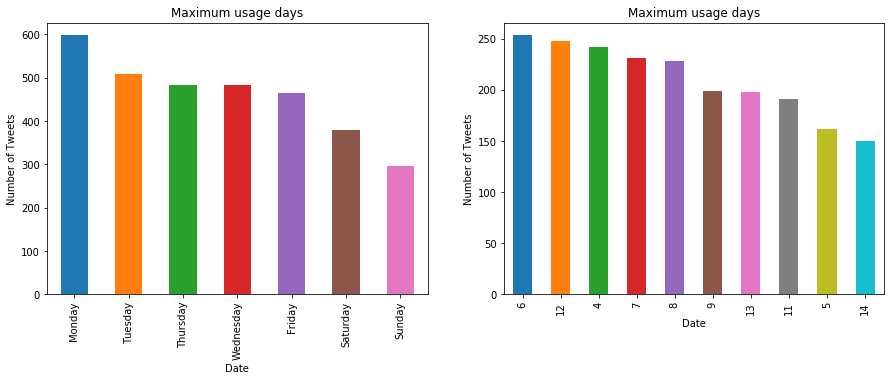

In [21]:
# Data Visualization
fig, ax=plt.subplots(1,2)
df_tweets.created_at.dt.weekday_name.value_counts().nlargest(10).plot(kind='bar',figsize=(15,5),ax=fig.axes[0])
ax[0].set_title('Maximum usage days')
ax[0].set_ylabel('Number of Tweets')
ax[0].set_xlabel('Date')

df_tweets.created_at.dt.hour.value_counts().nlargest(10).plot(kind='bar',figsize=(15,5),ax=fig.axes[1])
plt.title('Maximum usage days')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')

In [30]:
#!pip install plotly

  Running setup.py bdist_wheel for retrying: started
  Running setup.py bdist_wheel for retrying: finished with status 'done'
  Stored in directory: C:\Users\shrikant\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [34]:
#!pip install chart-studio

In [49]:
import chart_studio.plotly as py  #to create visualization
import plotly.graph_objs as go # go creates interactive visualization
from plotly.offline import iplot

from wordcloud import WordCloud, STOPWORDS #pip  install Wordcloud

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

df_tweets['Time'] = pd.to_datetime(df_tweets['created_at'],format='%y-%m-%d %H:%M:%S')
tweetsT = df_tweets['Time']
trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'),
    opacity=0.75
)
layout = go.Layout(
    title='Tweet Activity Over Years',
    height=450, 
    width=1200,
    xaxis=dict(title='Month and Year'),
    yaxis=dict(title='Tweet Qty'),
    bargap=0.2,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

PlotlyRequestError: Authentication credentials were not provided.

In [22]:
df_tweets_pop = df_tweets.groupby(['created_at','full_text'],as_index = False)['retweet_count'].sum().sort_values(by='retweet_count', ascending=False)

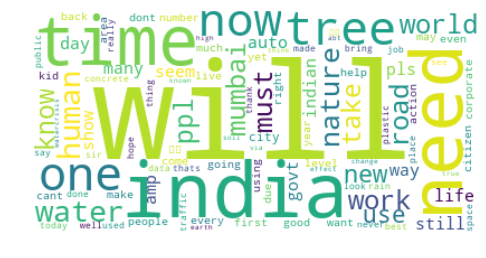

In [23]:
from wordcloud import WordCloud
def plot_wordcloud(msg):
    plt.figure(figsize=(8,8))
    wordcloud = WordCloud(max_font_size = 120, max_words=100, background_color="white").generate(",  ".join(msg))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    img_path = "./wordcloud.png"
    wordcloud.to_file(img_path)

plot_wordcloud(df_tweets['cleaned_text'])

In [47]:
!pip install nltk

In [48]:
#Remove Stopwords
#import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
cv = df_tweets['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])).to_frame()

regions = pd.Series(' ',join(cv['cleaned_text']).lower().split()),value_counts()[1:10].to_frame()
regions['y']=regions[0]
regions['x']=regions.index
regions.plot.pie(x='x',y='y',figsize=(7,7))
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\shrikant/nltk_data'
    - 'D:\\shrikant\\Application\\anaconda\\nltk_data'
    - 'D:\\shrikant\\Application\\anaconda\\share\\nltk_data'
    - 'D:\\shrikant\\Application\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\shrikant\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
